In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df=pd.read_csv("Meteorite_Landings.csv")

# Data Wrangling

In [3]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
df.shape

(45716, 10)

In [5]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

### 1.1 Dropping null  & duplicate rows (if there are any)

In [6]:
df.isna().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
45711    False
45712    False
45713    False
45714    False
45715    False
Length: 45716, dtype: bool

In [7]:
df = df[~df.isna().all(axis=1)]

In [8]:
# in case there is any duplicate...
df = df.drop_duplicates()

In [9]:
# We can see there were no NaN nor duplicate rows
df.shape

(45716, 10)

### 1.2 Dropping unnecesary columns

In [10]:
#GeoLocation is redundant. We keep separate coordinates to apply geopandas later
#id column is not necesary either

df = df.drop(columns=['GeoLocation', 'id'])


### 1.3 Checking null values in each column

In [11]:
df.isnull().sum()
#include years = ?
#delete 0 mass
#replace Nan geoloc 0,0

name           0
nametype       0
recclass       0
mass (g)     131
fall           0
year         291
reclat      7315
reclong     7315
dtype: int64

In [12]:
df.shape

(45716, 8)

### 1.4 Replacing NaN in latitude and longitude with zeros

In [13]:
df['reclat'] = df['reclat'].fillna(0)
df['reclong'] = df['reclong'].fillna(0)

In [14]:
df.isnull().sum()

name          0
nametype      0
recclass      0
mass (g)    131
fall          0
year        291
reclat        0
reclong       0
dtype: int64

### 1.5 We only keep records where mass > 0

In [15]:
df=df[df['mass (g)']>0]

In [16]:
#here we have deleted those records with NaN and 0 values as mass
df.shape

(45566, 8)

In [17]:
df = df.reset_index(drop=True)

In [18]:
df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...
45561,Zillah 002,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850
45562,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667
45563,Zlin,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667
45564,Zubkovsky,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460


### 1.6 Extrating the year and converting to numeric

In [19]:
df.isnull().sum()

name          0
nametype      0
recclass      0
mass (g)      0
fall          0
year        275
reclat        0
reclong       0
dtype: int64

In [20]:
df['year'] = df['year'].str.extract(r'(\d{4})')

In [21]:
df.head()

,name,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000


- In order to convert 'year' from object type to integer, we first should convert it to float, because we have NaN values we pretend to keep

In [22]:
df['year']= df['year'].astype('float')

In [23]:
df['year']= df['year'].astype('Int64')

In [24]:
df.dtypes

name         object
nametype     object
recclass     object
mass (g)    float64
fall         object
year          Int64
reclat      float64
reclong     float64
dtype: object

### 1.7 Looking for inaccurate values in 'year' column

In [25]:
df.sort_values(by = 'year', ascending=False)

,name,nametype,recclass,mass (g),fall,year,reclat,reclong
30606,Northwest Africa 7701,Valid,CK6,55.0,Found,2101,0.00000,0.00000
30705,Northwest Africa 7863,Valid,LL5,1000.0,Found,2013,0.00000,0.00000
30700,Northwest Africa 7857,Valid,LL6,246.0,Found,2013,0.00000,0.00000
30654,Northwest Africa 7755,Valid,Martian (shergottite),30.0,Found,2013,0.00000,0.00000
30687,Northwest Africa 7822,Valid,Achondrite-ung,45.8,Found,2013,0.00000,0.00000
...,...,...,...,...,...,...,...,...
38062,Valencia,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333
38086,Villa Regina,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667
38160,Wietrzno-Bobrka,Valid,Iron,376.0,Found,<NA>,49.41667,21.70000
38187,Wiltshire,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000


- 2101 year is wrong. It is a typo, because the actual year the meteorite was found is 2010  
https://www.lpi.usra.edu/meteor/metbull.php?code=57150

In [26]:
df.loc[30606, 'year'] = 2010

In [27]:
df.sort_values(by = 'year', ascending=False)

,name,nametype,recclass,mass (g),fall,year,reclat,reclong
30705,Northwest Africa 7863,Valid,LL5,1000.0,Found,2013,0.00000,0.00000
30700,Northwest Africa 7857,Valid,LL6,246.0,Found,2013,0.00000,0.00000
30686,Northwest Africa 7812,Valid,Angrite,46.2,Found,2013,0.00000,0.00000
30687,Northwest Africa 7822,Valid,Achondrite-ung,45.8,Found,2013,0.00000,0.00000
30698,Northwest Africa 7855,Valid,H4,916.0,Found,2013,0.00000,0.00000
...,...,...,...,...,...,...,...,...
38062,Valencia,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333
38086,Villa Regina,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667
38160,Wietrzno-Bobrka,Valid,Iron,376.0,Found,<NA>,49.41667,21.70000
38187,Wiltshire,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000


In [28]:
df.sort_values(by = 'year')

,name,nametype,recclass,mass (g),fall,year,reclat,reclong
685,Nogata,Valid,L6,472.0,Fell,860,33.72500,130.75000
271,Elbogen,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333
830,Rivolta de Bassi,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667
276,Ensisheim,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000
5325,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333
...,...,...,...,...,...,...,...,...
38062,Valencia,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333
38086,Villa Regina,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667
38160,Wietrzno-Bobrka,Valid,Iron,376.0,Found,<NA>,49.41667,21.70000
38187,Wiltshire,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000


- We see no weird numbers when sorting descending. The oldest meteorite spotting took place the year 850, according to documents

### 1.8 Creating new columns: country and continent

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [30]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
gdf=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.reclong, df.reclat))

In [32]:
#reprojecting to have the same crs
gdf.set_crs(epsg=4326, inplace=True)

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,geometry
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333,POINT (6.08333 50.77500)
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333,POINT (10.23333 56.18333)
2,Abee,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,POINT (-113.00000 54.21667)
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,POINT (-99.90000 16.88333)
4,Achiras,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,POINT (-64.95000 -33.16667)
...,...,...,...,...,...,...,...,...,...
45561,Zillah 002,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,POINT (17.01850 29.03700)
45562,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,POINT (8.96667 13.78333)
45563,Zlin,Valid,H4,3.3,Found,1939,49.25000,17.66667,POINT (17.66667 49.25000)
45564,Zubkovsky,Valid,L6,2167.0,Found,2003,49.78917,41.50460,POINT (41.50460 49.78917)


In [33]:
#When you reproject data you are modifying it. Thus you
#are introducing some uncertainty into your data. While
#this is a slightly less important issue when working with
#vector data (compared to raster), it’s important to consider

#If you are simply reprojecting to create a base map then it doesn’t matter what you reproject!

In [34]:
result = gpd.sjoin(gdf, world, how='left')

In [35]:
df['country']=result['name_right']
df['continent']=result['continent']

In [36]:
df=df.drop(columns='geometry')

#### We noticed that first row is returning a wrong country. In fact, this coordenates belong to Germany instead of Belgium. What's going on here?

In [37]:
import folium

In [38]:
poly_germ_belg= world.loc[world['name'].isin(['Germany','Belgium'])]

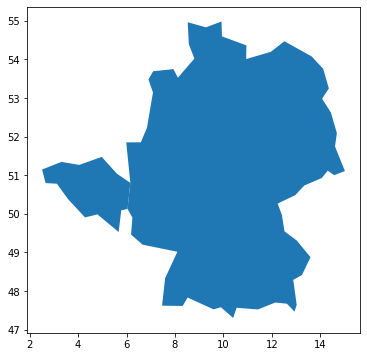

In [39]:
poly_germ_belg.plot(figsize=(6, 6))
plt.show()
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<img src = https://static.dw.com/image/18855805_403.png/ style="width: 500px;">

In [40]:
df.to_csv('meteorites_final.csv', index=False)

In [41]:
df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,country,continent
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333,Belgium,Europe
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333,Denmark,Europe
2,Abee,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,Canada,North America
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,Mexico,North America
4,Achiras,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,Argentina,South America
...,...,...,...,...,...,...,...,...,...,...
45561,Zillah 002,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,Libya,Africa
45562,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,Niger,Africa
45563,Zlin,Valid,H4,3.3,Found,1939,49.25000,17.66667,Czechia,Europe
45564,Zubkovsky,Valid,L6,2167.0,Found,2003,49.78917,41.50460,Russia,Europe


#### Trying to use geope instead of geopandas in Europe subset

In [42]:
df_Europe=df[df['continent']=='Europe']

In [43]:
df_Europe

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,country,continent
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333,Belgium,Europe
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333,Denmark,Europe
7,Agen,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,France,Europe
18,Alais,Valid,CI1,6000.0,Fell,1806,44.11667,4.08333,France,Europe
19,Albareto,Valid,L/LL4,2000.0,Fell,1766,44.65000,11.01667,Italy,Europe
...,...,...,...,...,...,...,...,...,...,...
45550,Zaragoza,Valid,"Iron, IVA-an",162000.0,Found,<NA>,41.65000,-0.86667,Spain,Europe
45556,Zerkaly,Valid,H5,16000.0,Found,1956,52.13333,81.96667,Russia,Europe
45558,Zhigansk,Valid,"Iron, IIIAB",900000.0,Found,1966,68.00000,128.30000,Russia,Europe
45563,Zlin,Valid,H4,3.3,Found,1939,49.25000,17.66667,Czechia,Europe


In [44]:
df_Europe.drop(columns=['country'])

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,continent
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333,Europe
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333,Europe
7,Agen,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,Europe
18,Alais,Valid,CI1,6000.0,Fell,1806,44.11667,4.08333,Europe
19,Albareto,Valid,L/LL4,2000.0,Fell,1766,44.65000,11.01667,Europe
...,...,...,...,...,...,...,...,...,...
45550,Zaragoza,Valid,"Iron, IVA-an",162000.0,Found,<NA>,41.65000,-0.86667,Europe
45556,Zerkaly,Valid,H5,16000.0,Found,1956,52.13333,81.96667,Europe
45558,Zhigansk,Valid,"Iron, IIIAB",900000.0,Found,1966,68.00000,128.30000,Europe
45563,Zlin,Valid,H4,3.3,Found,1939,49.25000,17.66667,Europe


In [45]:
from geopy.geocoders import Nominatim

In [46]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [47]:
def country(row):
    Latitude = str(row['reclat'])
    Longitude = str(row['reclong'])
    
    country = geolocator.reverse(Latitude+","+Longitude, timeout=1000).raw['address'].get('country', '')
    return country

In [48]:
df_Europe['country']=df_Europe.apply(country, axis=1)


KeyboardInterrupt: 

#### CONCLUSION:
- We will stick to geopandas and assume innacuracies for the meteorites that have fallen near to borders, because geopy gives time out error for large datasets